In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# グラフの定義
無向グラフ

In [2]:
def position2xy(nodeLocations:dict[str,tuple[float,float]])->tuple[dict[str,float],dict[str,float]]:
    """
    位置の一覧から、X座標とY座標の一覧を生成

    Parameters
    ---
    nodeLocations 頂点名->座標の一覧

    Returns
    ---
    (xp,yp) 頂点名->X座標の一覧、頂点名->Y座標の一覧
    """
    xp = dict()
    yp = dict()
    for v in nodeLocations.keys():
        (x,y) = nodeLocations[v]
        xp[v] = x
        yp[v] = y
    return xp,yp

In [3]:
def defineGraph()->tuple[nx.DiGraph,dict[str,tuple[float,float]],dict[tuple[str,str],str]]:
    """
    グラフの定義

    Returns
    ---
    G,nodeLocations,edgeLabels

    G nx.DiGraph グラフ
    nodeLocations 頂点の一覧
    edgeLabels 辺のラベル
    """
    #頂点の定義
    nodeList=["v0", "v1", "v2", "v3", "v4"]
    #頂点の位置座標
    nodeLocations={"v0":(0.2,0.2), "v1":(0.8,0.2), "v2":(.5,.5), "v3":(.8,.8), "v4":(.2,.8)}
    #弧の定義
    edgeList = [("v0","v1"), ("v0","v2"), ("v0","v4"), 
        ("v1","v2"), ("v1","v3"), ("v2","v3"), ("v2","v4")]
    #弧のラベル
    edgeLabels=dict()
    c = 0
    for e in edgeList:
        edgeLabels[e]=f'e{c}'
        c += 1
    
    G = nx.Graph()#無向グラフを定義
    G.add_nodes_from(nodeList)#頂点を定義
    G.add_edges_from(edgeList)#辺を定義
    xp,yp = position2xy(nodeLocations)
    nx.set_node_attributes(G, xp, 'x')#頂点のX座標
    nx.set_node_attributes(G, yp, 'y')#頂点のY座標
    nx.set_edge_attributes(G, edgeLabels, 'edge')#辺の定義
    return G, nodeLocations, edgeLabels

# 作図

In [4]:
def drawGraph(G:nx.DiGraph,nodeLocations:dict[str,tuple[float,float]],edgeLabels:dict[tuple[str,str]]):
    """
    作図
    """
    #準備
    font_size = 24
    node_size = 5000
    edge_width = 5.
    node_color = "c"
    arrowsize = 50
    plt.figure(figsize = (10, 10), facecolor = 'white')
    
    #頂点を描く
    nx.draw_networkx_nodes(G, nodeLocations, node_size = node_size, node_color = node_color)
    nx.draw_networkx_labels(G, nodeLocations, font_size = font_size)
    nx.draw_networkx_edges(G, nodeLocations, width = edge_width, node_size = node_size)
    #辺を描く
    nx.draw_networkx_edge_labels(G, nodeLocations, edge_labels = edgeLabels,
        font_size = font_size)
    plt.axis('off')
    plt.show()

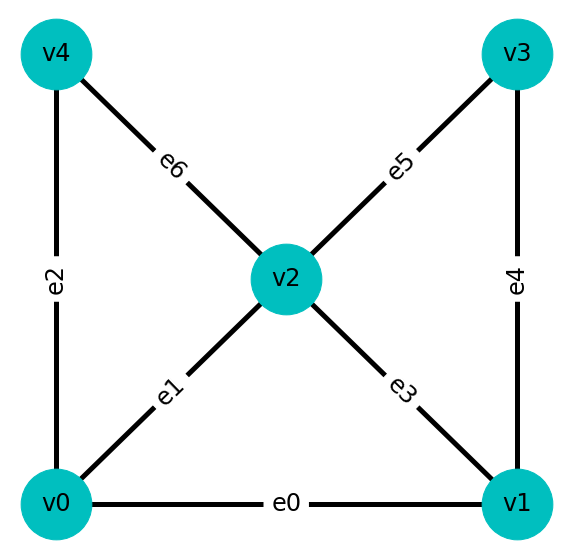

EdgeDataView([('v0', 'v1', {'edge': 'e0'}), ('v0', 'v2', {'edge': 'e1'}), ('v0', 'v4', {'edge': 'e2'}), ('v1', 'v2', {'edge': 'e3'}), ('v1', 'v3', {'edge': 'e4'}), ('v2', 'v3', {'edge': 'e5'}), ('v2', 'v4', {'edge': 'e6'})])

In [5]:
G, nodeLocations, edgeLabels = defineGraph()
drawGraph(G, nodeLocations, edgeLabels)
nx.write_pajek(G, 'sample.net')
G.edges(data = True)

In [6]:
G2 = nx.read_pajek('sample.net')
G2.nodes(data=True)

NodeDataView({'v0': {'id': '1', 'x': 0.2, 'y': 0.2, 'shape': 'ellipse'}, 'v1': {'id': '2', 'x': 0.8, 'y': 0.2, 'shape': 'ellipse'}, 'v2': {'id': '3', 'x': 0.5, 'y': 0.5, 'shape': 'ellipse'}, 'v3': {'id': '4', 'x': 0.8, 'y': 0.8, 'shape': 'ellipse'}, 'v4': {'id': '5', 'x': 0.2, 'y': 0.8, 'shape': 'ellipse'}})